In [16]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

#data=pd.read_csv('../input/machine-learning/heart_disease.csv')
data=pd.read_csv('../data/heart_disease.csv')

labels=data.values[:,-1]
labels[labels>1]=1
labels[labels==0]=-1
labels=labels.astype(int)

data=data.values[:,:-1]



In [17]:
# Only run before decision boundary visualization
#data=data[:,[3,7]]

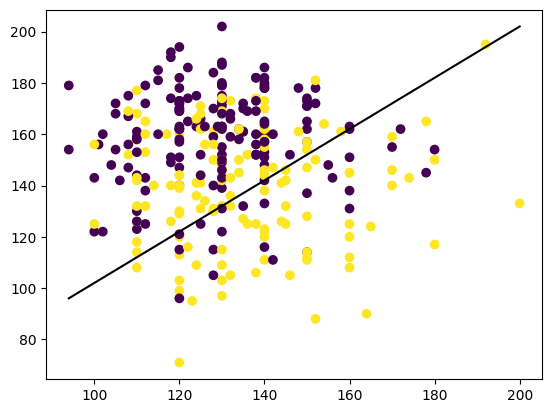

In [18]:
def visualize(data,labels,a,b):
	#plt.plot(data,labels)

	#plt.figure()

	plt.scatter(data[:,0],data[:,1],c=labels)

	xx = np.linspace(min(data[:,0]) , max(data[:,0]))
	M = -108.0 / -1986.0

	yy = a * xx + b

	plt.plot(xx, yy, 'k-')
	plt.pause(0.05)
	#plt.draw()


visualize(data[:,[3,7]],labels,1,2)

In [19]:
class Perceptron():
	def __init__(self):
		self.w_hat = None
		self.bias = None
		self.max_acc = 0
		self.lerningrate = 0.5
	def fit(self,data,labels,max_iterations=1000):
		w_hat = np.zeros(data.shape[1])
		bias = 1
		y = np.zeros(data.shape[0])
		for iteration in range(max_iterations):
			for i in range(data.shape[0]):
				y[i] = self.activation(np.dot(w_hat,data[i,:]) + bias)
				w_hat = w_hat + (self.lerningrate* (labels[i] - y[i]) * data[i,:])
				bias -= self.lerningrate * (labels[i] - y[i])
			w = w_hat
			a = - w[3] / w[7]
			b = bias
			visualize(data[:,[3,7]],y,a,b)
			if self.accuracy(labels,y) > self.max_acc:
				self.w_hat = w_hat
				self.bias = bias
				self.max_acc = self.accuracy(labels,y)

		print("itarations:",iteration)
		#print(self.w_hat)
		pass


	def predict(self,data):
		#print(data[0,:] * self.w_hat  + self.bias)
		ans = []
		for i in range(data.shape[0]):
			ans.append(self.activation(np.dot(self.w_hat,data[i,:]) + self.bias))
		#print(ans)
		return ans
		
		pass
	def activation(self,val):
		return 1 if val > 0 else -1 



	def accuracy(self,true,prediction):
		good_count = 0
		for i in range(len(true)):
			if true[i] == prediction[i]:
				good_count+=1
			else:
				pass
				#print(true[i],prediction[i])
		return good_count / len(true)
	def sensitivity(self,true,prediction):
		true_count = 0
		for i in range(len(true)):
			if true[i] == prediction[i] and true[i] > 0:
				true_count+=1
			else:
				pass
				#print(true[i],prediction[i])
		return true_count / len(true)
 
		

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

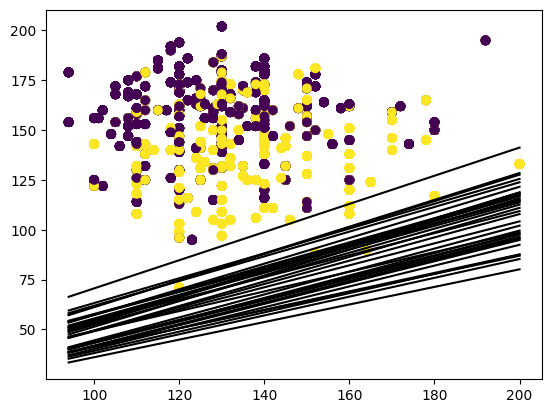

In [21]:
plt.figure()
pla=Perceptron()
pla.fit(data,labels)
prediction=pla.predict(data)
print(pla.accuracy(labels,prediction))
print(pla.sensitivity(labels,prediction))

w = pla.w_hat
a = w[3] / w[7]
b = 150
visualize(data[:,[3,7]],prediction,a,b)


In [ ]:
w[7] / -w[3] 

-22.355555555555554